In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [4]:
df.shape

(1338, 7)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

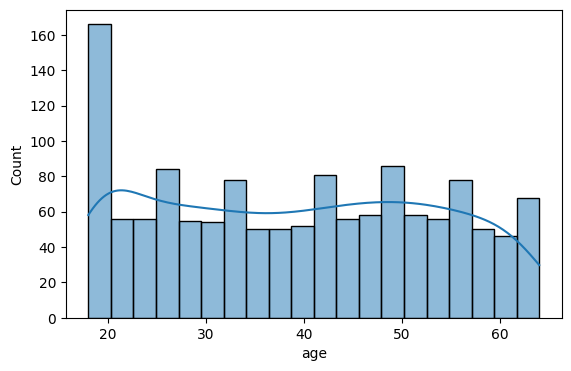

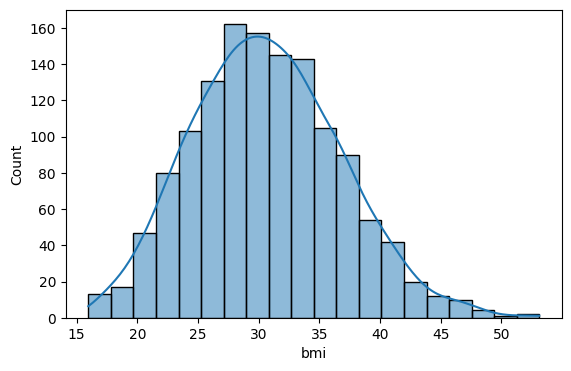

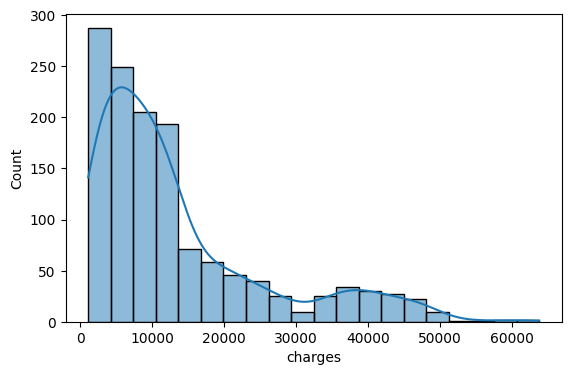

In [3]:
numeric_columns = ['age','bmi',"charges"]
for col in numeric_columns:
    plt.figure(figsize=(6.4,4))
    sns.histplot(df[col], kde="True", bins=20)
    plt.savefig("histplot.png")

<Axes: xlabel='sex', ylabel='count'>

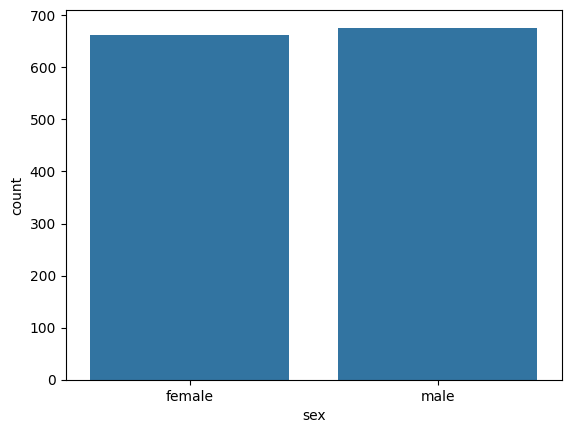

In [10]:
sns.countplot(x=df["sex"])

<Axes: xlabel='children', ylabel='count'>

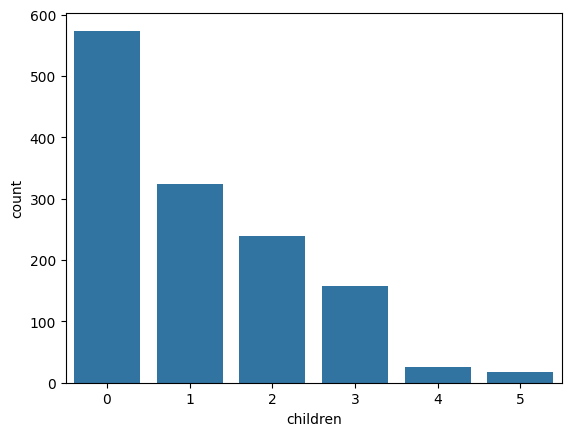

In [11]:
sns.countplot(x=df['children'])

<Axes: xlabel='smoker', ylabel='count'>

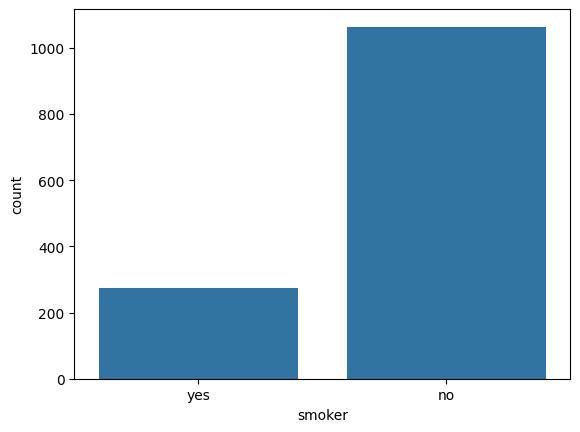

In [12]:
sns.countplot(x=df['smoker'])

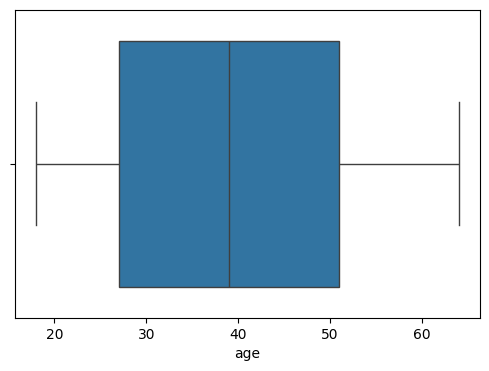

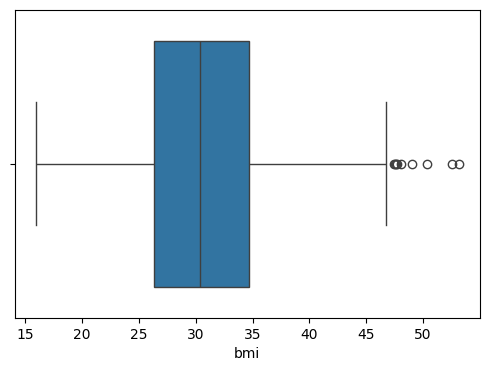

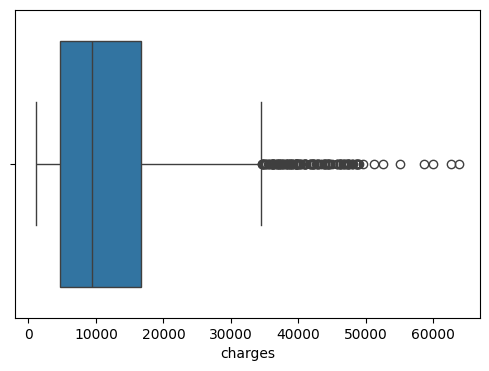

In [28]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

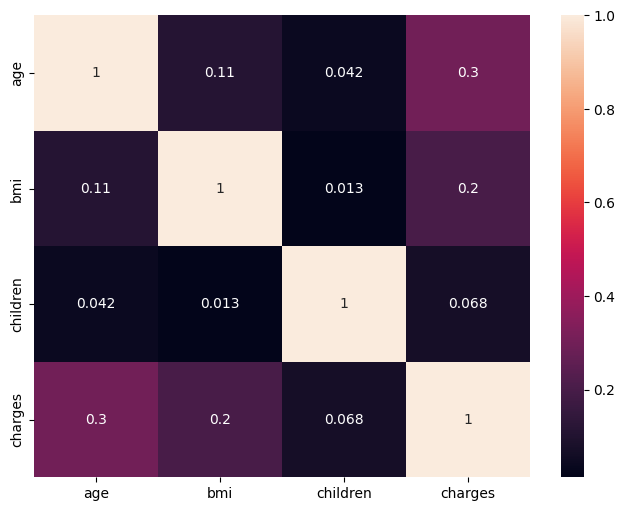

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning and Preprocessing

In [4]:
df_cleaned = df.copy()

In [28]:
df_cleaned.shape

(1338, 7)

In [5]:
df_cleaned.drop_duplicates(inplace=True)

In [6]:
df_cleaned.shape

(1337, 7)

In [33]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [34]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [6]:
df_cleaned["sex"] = df_cleaned["sex"].map({"male":0, "female":1})

In [7]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [37]:
df_cleaned["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [7]:
df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes":1,"no":0})

In [9]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [40]:
df_cleaned.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [8]:
df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker":"is_smoker"
},inplace=True)

In [11]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [43]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
df_cleaned = pd.get_dummies(df_cleaned,columns=["region"],drop_first=True)

In [10]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [11]:
df_cleaned= df_cleaned.astype({
    "region_northwest":int,
    "region_southeast":int,
    "region_southwest":int
})

In [12]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

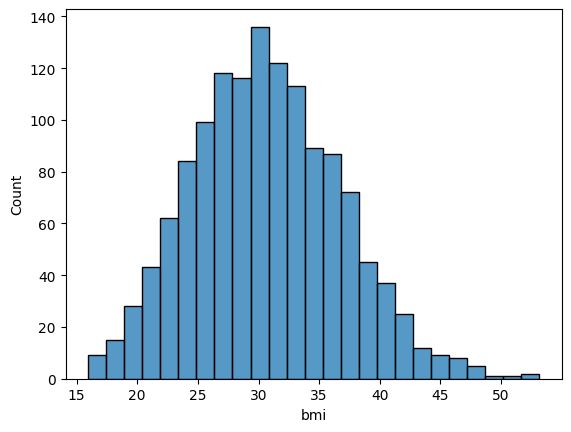

In [55]:
sns.histplot(df["bmi"])

In [13]:
df_cleaned["bmi_category"] = pd.cut(
    df_cleaned["bmi"],
    bins=[0,18.5, 24.9, 30, float("inf")],
    labels=["Underweight","Normal","Overweight","Obese"]

)

In [17]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,0,1,Overweight
1,18,0,33.770,1,0,1725.55230,0,0,1,0,Obese
2,28,0,33.000,3,0,4449.46200,0,0,1,0,Obese
3,33,0,22.705,0,0,21984.47061,0,1,0,0,Normal
4,32,0,28.880,0,0,3866.85520,0,1,0,0,Overweight


In [14]:
df_cleaned = pd.get_dummies(df_cleaned,columns=["bmi_category"],drop_first=True)

In [15]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,1,False,True,False
1,18,0,33.770,1,0,1725.55230,0,1,0,False,False,True
2,28,0,33.000,3,0,4449.46200,0,1,0,False,False,True
3,33,0,22.705,0,0,21984.47061,1,0,0,True,False,False
4,32,0,28.880,0,0,3866.85520,1,0,0,False,True,False


In [16]:
df_cleaned = df_cleaned.astype({
    "bmi_category_Normal":int,
    "bmi_category_Overweight":int,
    "bmi_category_Obese":int
})

In [17]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0


In [18]:
from sklearn.preprocessing import StandardScaler
cols = ["age","bmi","children"]
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [16]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0,0,1,0,0,1,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,0,0,1,0,0,0,0,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,0,1,0,0,0,0,1,0


In [24]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [19]:
from scipy.stats import pearsonr

#--------------------------------------
# Pearson Correlation Calculation
#--------------------------------------

# List of features to check against target
selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast',
       'region_southwest',  'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese']

correlations = {
    feature:pearsonr(df_cleaned[feature], df_cleaned["charges"])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=["Feature","Pearson Correlation"])
correlations_df.sort_values(by="Pearson Correlation", ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298308
10,bmi_category_Obese,0.200501
2,bmi,0.198401
6,region_southeast,0.073578
3,children,0.067389
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058044
8,bmi_category_Normal,-0.105655


charges                     1.000000
is_smoker                   0.787251
age                         0.299008
bmi_category_Obese          0.199683
bmi                         0.198341
region_southeast            0.073982
children                    0.067998
region_northeast            0.006349
region_northwest           -0.039905
region_southwest           -0.043210
bmi_category_Underweight   -0.048117
is_female                  -0.057292
bmi_category_Normal        -0.105291
bmi_category_Overweight    -0.120096
Name: charges, dtype: float64


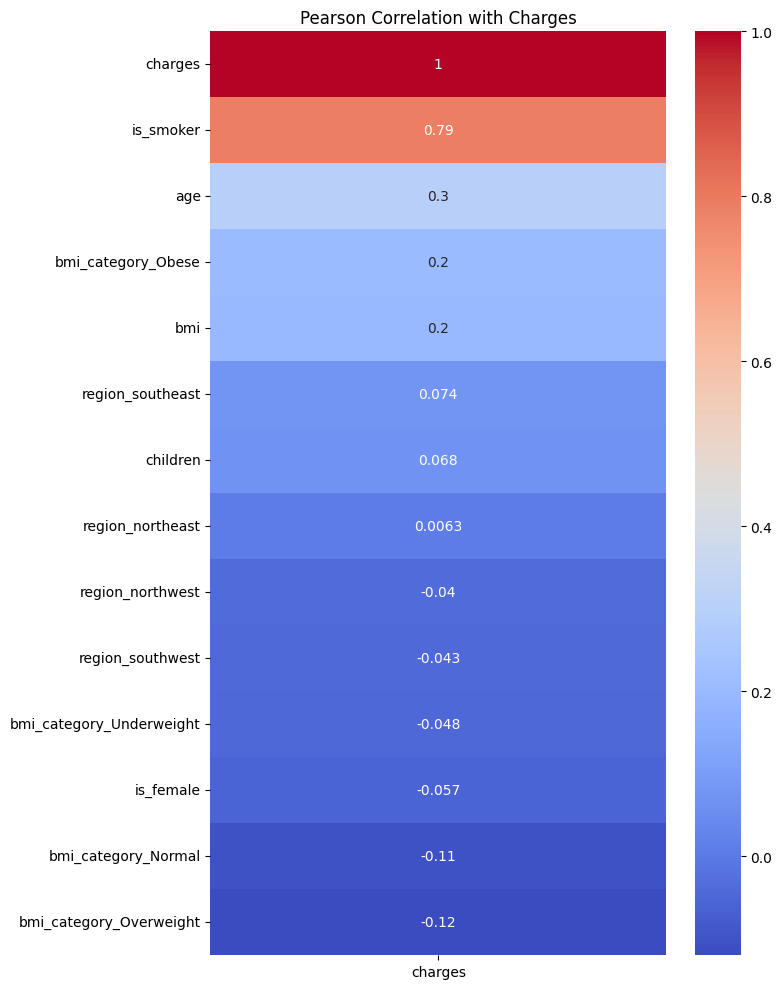

In [15]:
features = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker',
    'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Underweight', 'bmi_category_Normal',
    'bmi_category_Overweight', 'bmi_category_Obese'
]

target = 'charges'

# =========================
# Pearson Correlation
# =========================
corr_matrix = df_cleaned[features + [target]].corr(method='pearson')

# charges ke sath sirf correlation
charges_corr = corr_matrix[target].sort_values(ascending=False)
print(charges_corr)

# =========================
# Visualization (Heatmap)
# =========================
plt.figure(figsize=(8, 10))
sns.heatmap(
    corr_matrix[[target]].sort_values(by=target, ascending=False),
    annot=True,
    cmap="coolwarm"
)
plt.title("Pearson Correlation with Charges")
plt.tight_layout()
plt.savefig("Pearson Correlation with charges.png")

In [26]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

### Relation Between Categorical Columns 

In [20]:
cat_features = [
    'is_female','is_smoker','region_northwest', 'region_southeast',
       'region_southwest',  'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'
]

In [21]:
# =========================
# Imports
# =========================
import pandas as pd
from scipy.stats import chi2_contingency


alpha = 0.05
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}


# =========================
# Chi-Square: Feature vs Charges Bin
# =========================


for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = "Reject Null (Keep Feature)" if p_val < alpha else "Accept Null (Drop Features)"
    chi2_results[col] ={
        'chi2_statistics':chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }
        



chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistics,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.554126,0.035846,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Features)
bmi_category_Overweight,4.796378,0.187329,Accept Null (Drop Features)
bmi_category_Normal,4.263673,0.234364,Accept Null (Drop Features)
region_northwest,1.13424,0.768815,Accept Null (Drop Features)


In [34]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,charges_bin
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0,1,0,1,0,3
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,0,1,0,0,0,1,0
2,-0.799350,0,0.383155,1.580143,0,4449.46200,0,1,0,0,0,1,0
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,1,0,0,1,0,0,3
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,1,0,0,0,1,0,0


In [58]:
final_df = df_cleaned[["age","is_female","bmi","children","is_smoker","charges","region_southeast","region_northwest","region_southwest","bmi_category_Obese"]]

In [23]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,1,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,1,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.050269,1.580143,0,10600.54830,0,1
1334,-1.511647,1,0.206053,-0.909234,0,2205.98080,0,1
1335,-1.511647,1,1.014490,-0.909234,0,1629.83350,1,1
1336,-1.297958,1,-0.797524,-0.909234,0,2007.94500,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [59]:
X = final_df.drop('charges',axis=1)
y = final_df["charges"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2


0.8053102344347305

In [64]:
n= X_test.shape[0]
p= X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7985187309847792